<a href="https://colab.research.google.com/github/Saigirish-Suryadevara/Saigirish_INFO5731_Fall2024/blob/main/Final_Project_RoBerta_prediction_model_graphs_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install transformers datasets torch scikit-learn pandas


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import pandas as pd


file_path = "/content/reddit_comments_online (3).xlsx"
data = pd.read_excel(file_path)


data['post_id'] = data['post_id'].astype(str)


train_data, val_data = train_test_split(data, test_size=0.1, random_state=42)


train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)


tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(examples):
    return tokenizer(examples['comment_body'], truncation=True, padding=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)


train_dataset = train_dataset.rename_column("Final_label", "labels")
val_dataset = val_dataset.rename_column("Final_label", "labels")


train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=6)


training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)


from sklearn.metrics import accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


trainer.train()


unlabeled_dataset = Dataset.from_pandas(data)
unlabeled_dataset = unlabeled_dataset.map(tokenize_function, batched=True)
unlabeled_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])


predictions = trainer.predict(unlabeled_dataset)
predicted_labels = predictions.predictions.argmax(axis=-1)


data['Predicted_label'] = predicted_labels


output_file = "reddit_comments_with_predictions.xlsx"
data.to_excel(output_file, index=False)

print(f"Labeled data saved to {output_file}")


Map:   0%|          | 0/4693 [00:00<?, ? examples/s]

Map:   0%|          | 0/522 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-19-82e9b507194f>:66: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.710303,0.756705
2,0.773400,0.683521,0.735632
3,0.773400,0.679888,0.762452


Map:   0%|          | 0/5215 [00:00<?, ? examples/s]

Labeled data saved to reddit_comments_with_predictions.xlsx


<ipython-input-7-3229bc87fc58>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


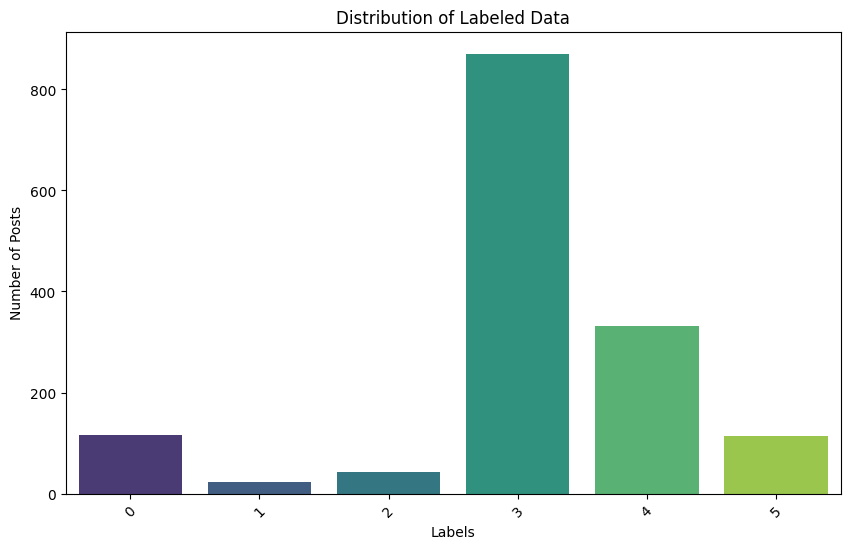

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Labeled data distribution (first 1500)
label_counts = labeled_data['Final_label'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Labeled Data')
plt.xlabel('Labels')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

   post_id                                       post_title  post_score  \
0  18sntre    Give advice before to start CS50 data-science           5   
1  18sntre    Give advice before to start CS50 data-science           5   
2  18sntre    Give advice before to start CS50 data-science           5   
3  14bzs13            Data Science: Machine Learning course           5   
4   kafq89  Is there any cs50 data science/analytics track?           3   

                                            post_url Keyword_search  \
0  https://www.reddit.com/r/cs50/comments/18sntre...   data science   
1  https://www.reddit.com/r/cs50/comments/18sntre...   data science   
2  https://www.reddit.com/r/cs50/comments/18sntre...   data science   
3  https://www.reddit.com/r/cs50/comments/14bzs13...   data science   
4  https://www.reddit.com/r/cs50/comments/kafq89/...   data science   

  comment_id   parent_id  comment_depth  \
0    kfbuw7w  t3_18sntre              0   
1    kfxq3e3  t1_kfbuw7w            

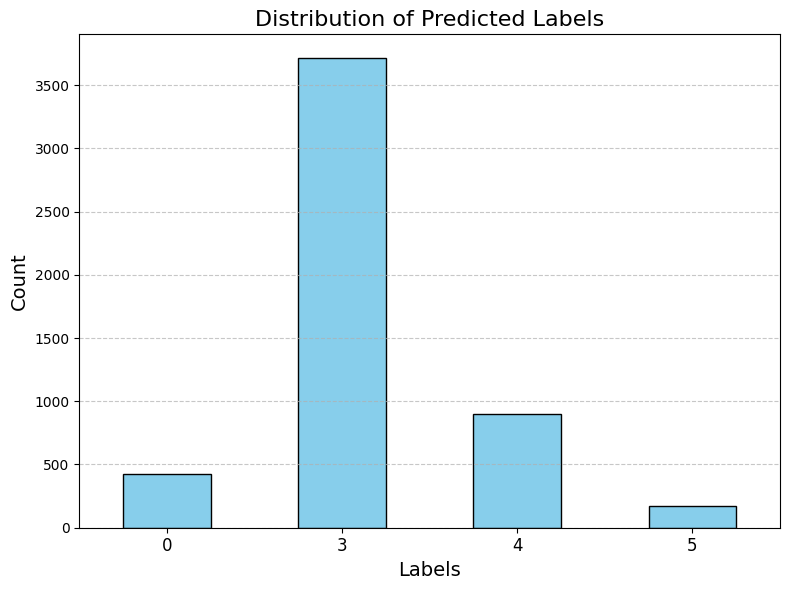

In [3]:
import matplotlib.pyplot as plt

file_path = '/content/reddit_comments_with_predictions (3).xlsx'  # Replace with your file's name
df = pd.read_excel(file_path)


print(df.head())

plt.figure(figsize=(8, 6))
df['Predicted_label'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Distribution of Predicted Labels', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

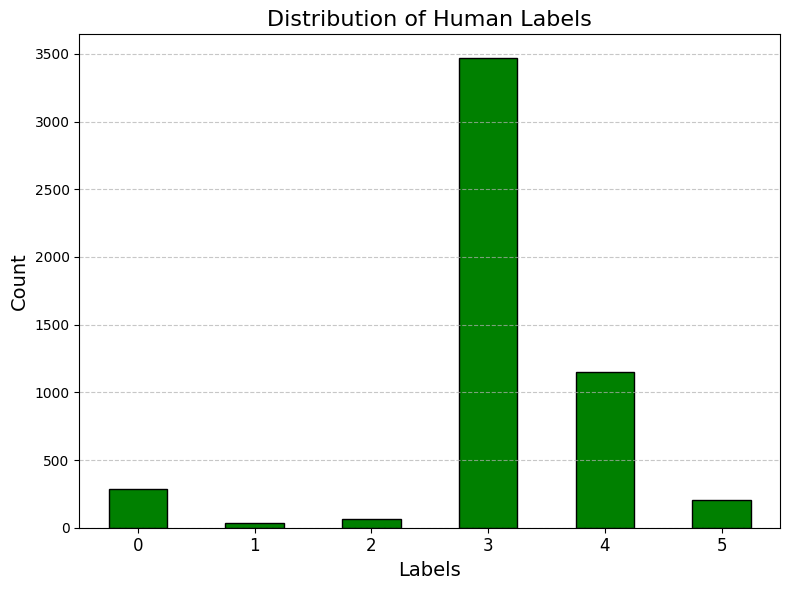

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/reddit_comments_online (3).xlsx'  # Replace with your file's name
df = pd.read_excel(file_path)

plt.figure(figsize=(8, 6))
df['Final_label'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')


plt.title('Distribution of Human Labels', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Accuracy': 0.8347075743048897, 'Precision': 0.8187586230570075, 'Recall': 0.8347075743048897, 'F1 Score': 0.8218163128016996}


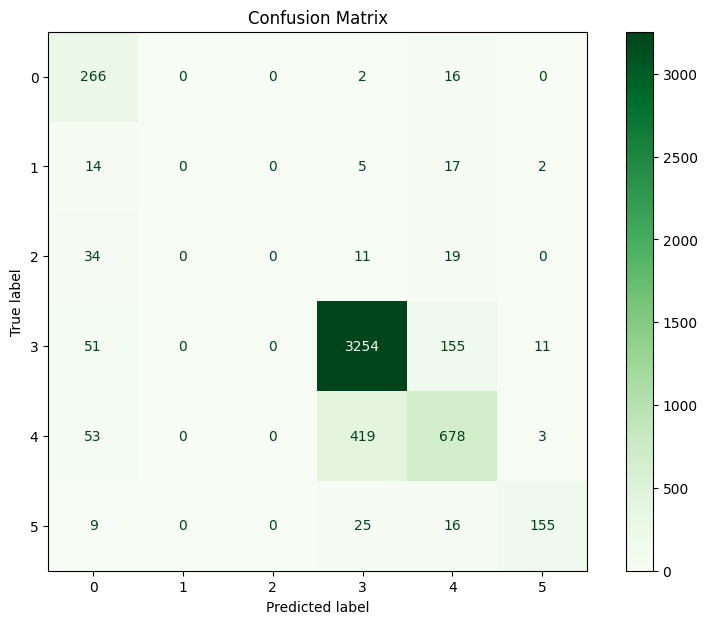

<ipython-input-21-09a332458147>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Final_label', data=data, palette='Set2', alpha=0.5, label='Final Labels')
<ipython-input-21-09a332458147>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_label', data=data, palette='Set1', alpha=0.5, label='Predicted Labels')


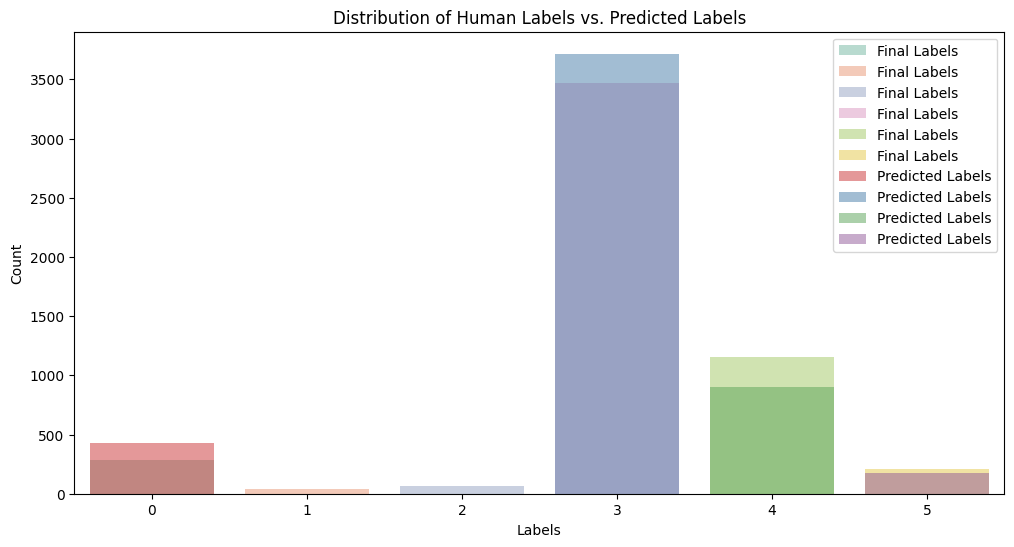

In [ ]:

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/reddit_comments_with_predictions.xlsx'
data = pd.read_excel(file_path)


final_labels = data['Final_label']
predicted_labels = data['Predicted_label']


accuracy = accuracy_score(final_labels, predicted_labels)
precision = precision_score(final_labels, predicted_labels, average='weighted')
recall = recall_score(final_labels, predicted_labels, average='weighted')
f1 = f1_score(final_labels, predicted_labels, average='weighted')


metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
print(metrics)


cm = confusion_matrix(final_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(data['Final_label'].unique()))


plt.figure(figsize=(10, 7))
disp.plot(cmap='Greens', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='Final_label', data=data, palette='Set2', alpha=0.5, label='Final Labels')
sns.countplot(x='Predicted_label', data=data, palette='Set1', alpha=0.5, label='Predicted Labels')
plt.title("Distribution of Human Labels vs. Predicted Labels")
plt.legend(loc='upper right')
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()


